<a href="https://colab.research.google.com/github/EDC21/Deep-Learning/blob/master/Examples%20from%20%E3%80%8AHands-on%20ML%E3%80%8B/Chapter%2011-%20Training%20Deep%20NN/Faster_Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Faster Optimizers

##Momentum optimization

In [ ]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9)

## Nesterov Accelerated Gradient

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)

## AdaGrad

In [ ]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

## RMSProp

In [ ]:
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)

## Adam Optimization


In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

## Adamax Optimization

In [ ]:
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)

## Nadam Optimization

In [ ]:
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)

#Learning Rate Scheduling

##Power Scheduling

Set the learning rate to a function of the iteration number.  
```lr = lr0 / (1 + steps / s)**c```
* Keras uses `c=1` and `s = 1 / decay`

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4854 - accuracy: 0.8301 - val_loss: 0.4064 - val_accuracy: 0.8616
Epoch 2/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3816 - accuracy: 0.8644 - val_loss: 0.3776 - val_accuracy: 0.8714
Epoch 3/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3485 - accuracy: 0.8767 - val_loss: 0.3661 - val_accuracy: 0.8718
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3278 - accuracy: 0.8830 - val_loss: 0.3572 - val_accuracy: 0.8728
Epoch 5/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3116 - accuracy: 0.8886 - val_loss: 0.3496 - val_accuracy: 0.8758
Epoch 6/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2996 - accuracy: 0.8933 - val_loss: 0.3461 - val_accuracy: 0.8804
Epoch 7/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2895 - accuracy: 0.8967 - val_loss: 0.3351 - val_accuracy:

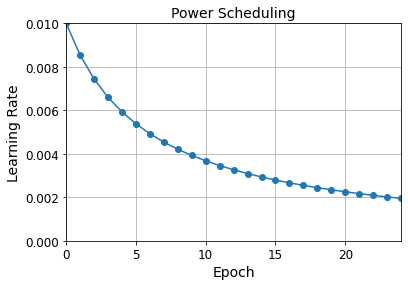

In [ ]:
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = len(X_train) // batch_size
epochs = np.arange(n_epochs)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

##Expoential Scheduling

```lr = lr0 * 0.1**(epoch / s)```

In [ ]:
def exponential_decay_fn(epoch):
  return 0.01 * 0.1**(epoch / 20)

In [ ]:
def exponential_decay(lr0, s):
  def exponential_decay_fn(epoch):
    return lr0 * 0.1**(epoch / s)
  return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8496 - accuracy: 0.7594 - val_loss: 1.1741 - val_accuracy: 0.6540
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7336 - accuracy: 0.7901 - val_loss: 0.6966 - val_accuracy: 0.7798
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6452 - accuracy: 0.8088 - val_loss: 0.7278 - val_accuracy: 0.7882
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5927 - accuracy: 0.8220 - val_loss: 0.6308 - val_accuracy: 0.7766
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5225 - accuracy: 0.8429 - val_loss: 0.6264 - val_accuracy: 0.8500
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4781 - accuracy: 0.8526 - val_loss: 0.6402 - val_accuracy: 0.8116
Epoch 7/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4478 - accuracy: 0.8624 - val_loss: 0.5169 - val_accuracy

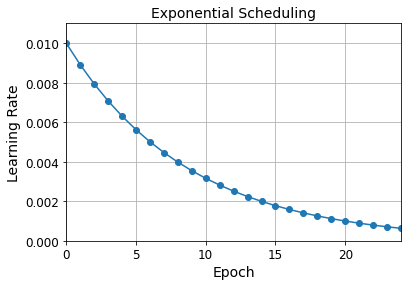

In [ ]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

##Piecewise Constant Scheduling

In [ ]:
def piecewise_constant_fn(epoch):
  if epoch < 5:
      return 0.01
  elif epoch < 15:
      return 0.005
  else:
      return 0.001

In [ ]:
def piecewise_constant(boundaries, values):
  boundaries = np.array([0] + boundaries)
  values = np.array(values)
  def piecewise_constant_fn(epoch):
    return values[np.argmax(boundaries > epoch) - 1]
  return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [ ]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8515 - accuracy: 0.7588 - val_loss: 0.7050 - val_accuracy: 0.7876
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8333 - accuracy: 0.7613 - val_loss: 0.6880 - val_accuracy: 0.7958
Epoch 3/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8430 - accuracy: 0.7522 - val_loss: 0.8712 - val_accuracy: 0.7662
Epoch 4/25
1719/1719 [==============================] - 9s 5ms/step - loss: 1.1102 - accuracy: 0.6549 - val_loss: 1.1694 - val_accuracy: 0.6390
Epoch 5/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.9970 - accuracy: 0.6747 - val_loss: 1.2226 - val_accuracy: 0.6116
Epoch 6/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7458 - accuracy: 0.7302 - val_loss: 0.7805 - val_accuracy: 0.7540
Epoch 7/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6873 - accuracy: 0.7429 - val_loss: 0.7242 - val_accuracy:

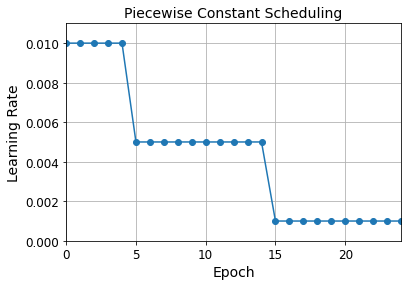

In [ ]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

##1Cycle scheduling

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

430/430 [==============================] - 3s 6ms/step - loss: nan - accuracy: 0.3862


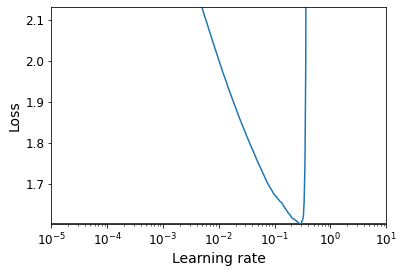

In [ ]:
batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1, batch_size=batch_size)
plot_lr_vs_loss(rates, losses)

In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [ ]:
n_epochs = 25
onecycle = OneCycleScheduler(len(X_train) // batch_size * n_epochs, max_rate=0.05)
history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                    validation_data=(X_valid_scaled, y_valid),
                    callbacks=[onecycle])

Epoch 1/25
430/430 [==============================] - 3s 6ms/step - loss: 0.6572 - accuracy: 0.7740 - val_loss: 0.4872 - val_accuracy: 0.8338
Epoch 2/25
430/430 [==============================] - 3s 6ms/step - loss: 0.4581 - accuracy: 0.8396 - val_loss: 0.4273 - val_accuracy: 0.8522
Epoch 3/25
430/430 [==============================] - 3s 6ms/step - loss: 0.4121 - accuracy: 0.8546 - val_loss: 0.4115 - val_accuracy: 0.8586
Epoch 4/25
430/430 [==============================] - 3s 6ms/step - loss: 0.3837 - accuracy: 0.8641 - val_loss: 0.3868 - val_accuracy: 0.8686
Epoch 5/25
430/430 [==============================] - 3s 6ms/step - loss: 0.3639 - accuracy: 0.8716 - val_loss: 0.3765 - val_accuracy: 0.8682
Epoch 6/25
430/430 [==============================] - 3s 6ms/step - loss: 0.3457 - accuracy: 0.8773 - val_loss: 0.3744 - val_accuracy: 0.8706
Epoch 7/25
430/430 [==============================] - 3s 6ms/step - loss: 0.3330 - accuracy: 0.8809 - val_loss: 0.3636 - val_accuracy: 0.8718
Epoch 